In [1]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 

import numpy as np
import pandas as pd
from makeEnv import acousticEnv
from wni import Corgi
from normalMode import Chinook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
f = 23
sd = 76
c_w = 1500
c_b = 1800
rho_w = 1000
rho_b = 1800
atten = 0.2
d = 100
world = acousticEnv()
world.pekeris(c_w, c_b, rho_w, rho_b, atten, d)

In [3]:
zPlot = np.r_[1:150:100j]
rPlot = np.r_[1:10000:200j]
rMax = np.max(rPlot)

In [4]:
wni_model = Corgi(world, sd, f, zPlot, rMax)
wni_model.integrateSpectrum(min_r = 1)

(150.0, 0)

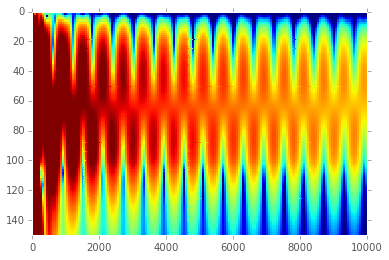

In [5]:
p_wni = wni_model.getPressure()
r_wni = p_wni.index
TL = 20 * np.log10(np.abs(p_wni))
Z, R = np.meshgrid(p_wni.columns, p_wni.index)
plt.pcolormesh(R.T, Z.T, np.array(TL).T)
plt.clim(-80, -50)
plt.xlim(0, 10000)
plt.ylim(np.max(zPlot),0)

In [6]:
nm_model = Chinook(f, world)
# nm_model.calculateModes_shooting()
nm_model.calculateModes_eig(600, 10)

In [7]:
p_nm = nm_model.calculatePressure(sd, zPlot, rPlot)
print(nm_model.countNumberModes())

2


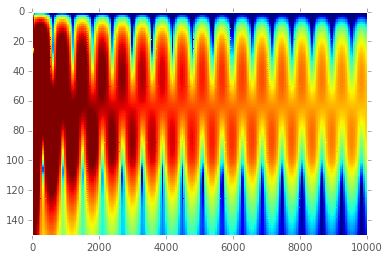

In [8]:
R_nm, Z = np.meshgrid(p_nm.index, p_nm.columns)
TL_nm = 20 * np.log10(np.abs(p_nm.T))
plt.pcolormesh(R_nm, Z, np.array(TL_nm))
plt.clim(-80, -50)
plt.xlim(0, 10000)
plt.ylim(np.max(zPlot),0)
plt.show()

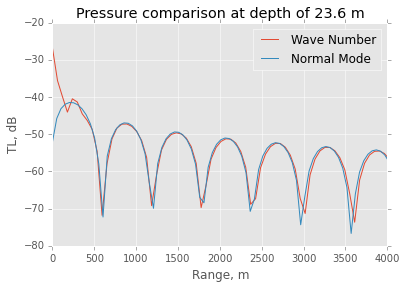

In [9]:
comparisonI = 15
zComp = zPlot[comparisonI]

plt.plot(r_wni, np.array(20 * np.log10(np.abs(p_wni[zComp]))),\
        label='Wave Number')
plt.plot(rPlot, np.array(20 * np.log10(np.abs(p_nm[zComp]))),\
        label='Normal Mode')
plt.xlim(0, 4000)
plt.ylim(-80,-20)
plt.legend()
plt.title('Pressure comparison at depth of ' + "{0:.1f}".format(zComp) + ' m')
plt.ylabel('TL, dB')
plt.xlabel('Range, m')
plt.savefig('./figures/pressureComp')

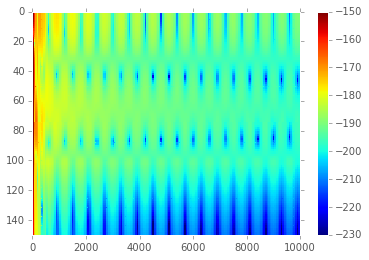

In [11]:
v_wni = 1j * 2 * np.pi * f * wni_model.getDisplacement()
TL_vel_wni = 20 * np.log10(np.abs(v_wni + np.spacing(1)))
Z, R = np.meshgrid(v_wni.columns, v_wni.index)
_ = plt.pcolormesh(R.T, Z.T, np.array(TL_vel_wni).T)
_ = plt.clim(-230, -150)
_ = plt.xlim(0, 10000)
_ = plt.ylim(np.max(zPlot),0)
_ = plt.colorbar()

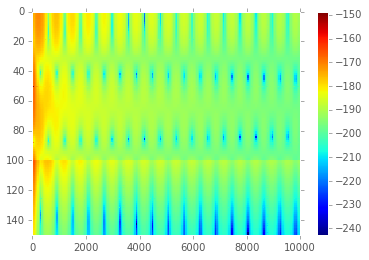

In [12]:
v_nm = nm_model.calculatePressure(sd, zPlot, rPlot, isPressure = False)
TL_vel_nm = 20 * np.log10(np.abs(v_nm))
Z, R = np.meshgrid(v_nm.columns, v_nm.index)
plt.pcolormesh(R.T, Z.T, np.array(TL_vel_nm.T))
# _ = plt.clim(-230, -150)
_ = plt.xlim(0, 10000)
_ = plt.ylim(np.max(zPlot),0)
_ = plt.colorbar()
_ = plt.show()

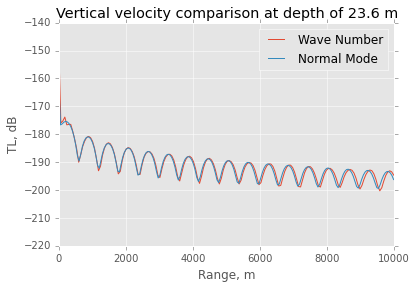

In [13]:
plt.plot(v_wni.index, TL_vel_wni[zComp],\
        label='Wave Number')
plt.plot(p_nm.index, TL_vel_nm[zComp],\
        label='Normal Mode')
plt.xlim(0, 10000)
plt.legend()
plt.title('Vertical velocity comparison at depth of ' + "{0:.1f}".format(zComp) + ' m')
plt.xlabel('Range, m')
plt.ylabel('TL, dB')
plt.savefig('./figures/velocityComp')

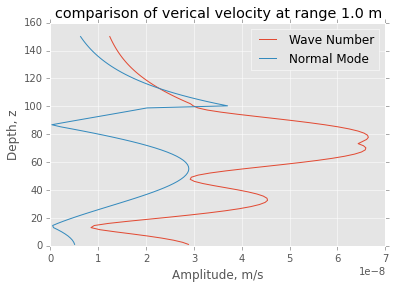

In [14]:
# Look at the sign of the velocity measurement with depth
plt.plot(np.abs(v_wni.ix[v_wni.index[0], :]), v_wni.columns,\
        label='Wave Number')
plt.plot(np.abs(v_nm.ix[v_nm.index[0], :]), p_nm.columns,\
        label='Normal Mode')
plt.legend()
plt.title('comparison of verical velocity at range ' + str(v_wni.index[0]) + ' m')
plt.ylabel('Depth, z')
plt.xlabel('Amplitude, m/s')
plt.show()

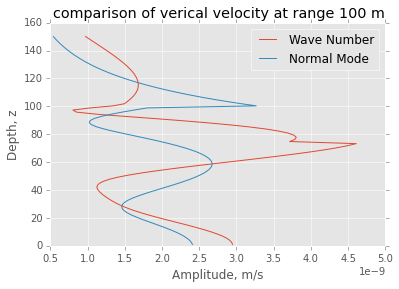

In [15]:
# Look at the sign of the velocity measurement with depth
rRange = 100
wni_I = np.argmin(np.array(np.abs(v_wni.index - rRange)))
nm_I = np.argmin(np.array(np.abs(v_nm.index - rRange)))

plt.plot(np.abs(v_wni.ix[v_wni.index[wni_I], :]), v_wni.columns,\
        label='Wave Number')
plt.plot(np.abs(v_nm.ix[v_nm.index[nm_I], :]), p_nm.columns,\
        label='Normal Mode')
plt.legend()
plt.title('comparison of verical velocity at range ' + str(rRange) + ' m')
plt.ylabel('Depth, z')
plt.xlabel('Amplitude, m/s')
plt.show()

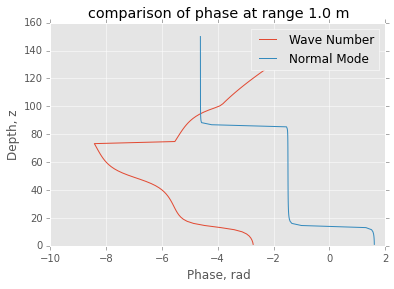

In [16]:
# Look at the sign of the velocity measurement with depth
plt.plot(np.unwrap(np.angle(v_wni.ix[v_wni.index[0], :])), v_wni.columns,\
        label='Wave Number')
plt.plot(np.unwrap(np.angle(v_nm.ix[v_nm.index[0], :])), p_nm.columns,\
        label='Normal Mode')
plt.legend()
plt.title('comparison of phase at range ' + str(v_wni.index[0]) + ' m')
plt.ylabel('Depth, z')
plt.xlabel('Phase, rad')
plt.show()

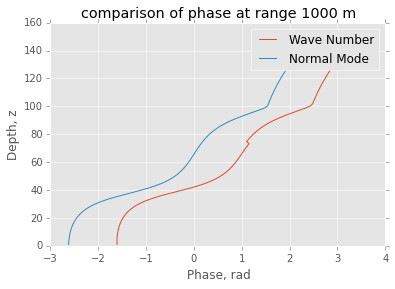

In [17]:
# Look at the sign of the velocity measurement with depth
rRange = 1000
wni_I = np.argmin(np.array(np.abs(v_wni.index - rRange)))
nm_I = np.argmin(np.array(np.abs(v_nm.index - rRange)))
plt.plot(np.unwrap(np.angle(v_wni.ix[v_wni.index[wni_I], :])), v_wni.columns,\
        label='Wave Number')
plt.plot(np.unwrap(np.angle(v_nm.ix[v_nm.index[nm_I], :])), p_nm.columns,\
        label='Normal Mode')
plt.legend()
plt.title('comparison of phase at range ' + str(rRange) + ' m')
plt.ylabel('Depth, z')
plt.xlabel('Phase, rad')
plt.show()

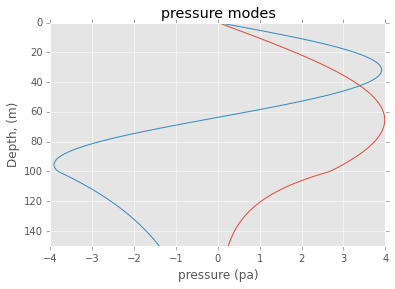

In [18]:
# Plot pressure modes
pressureModes = nm_model.getPsi(zPlot, isPressure = True)
_ = plt.plot(pressureModes, zPlot)
_ = plt.title('pressure modes')
_ = plt.ylabel('Depth, (m)')
_ = plt.xlabel('pressure (pa)')
_ = plt.ylim(np.max(zPlot), 0)

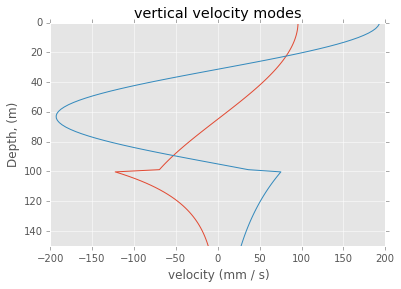

In [19]:
# Plot velocity modes
velModes = nm_model.getPsi(zPlot, isPressure = False)
_ = plt.plot(velModes * 1e3, zPlot)
_ = plt.title('vertical velocity modes')
_ = plt.ylabel('Depth, (m)')
_ = plt.xlabel('velocity (mm / s)')
_ = plt.ylim(np.max(zPlot), 0)